In [2]:
import boto3
import sagemaker
import time
from time import strftime

boto_session = boto3.Session()
sagemaker_session = sagemaker.Session(boto_session=boto_session)
sm_client = boto3.client("sagemaker")
region = boto_session.region_name
bucket = sagemaker_session.default_bucket()
role = sagemaker.get_execution_role()
account = sagemaker_session.boto_session.client("sts").get_caller_identity()["Account"]

prefix = 'sagemaker-intel-classification-dvc'

#print(f"account: {account}")
#print(f"bucket: {bucket}")
#print(f"region: {region}")
#print(f"role: {role}")

In [3]:
from sagemaker.pytorch import PyTorch
from sagemaker import get_execution_role
from sagemaker.debugger import TensorBoardOutputConfig

# Deploy the model

In [4]:
from sagemaker.pytorch import PyTorchModel
from sagemaker.serializers import JSONSerializer
from sagemaker.deserializers import JSONDeserializer

Get the `model_data` from the models uploaded to S3 of the aboved training


Once your debugging is done, it's better to simply call `pt_estimator.deploy`

In [5]:
model = PyTorchModel(
    entry_point="infer.py",
    source_dir="sagemaker-intel",
    role=get_execution_role(),
    model_data="s3://sagemaker-ap-southeast-2-536176424191/training-intel-dataset-2022-12-15-15-44-51-564/output/model.tar.gz",
    framework_version="1.12.0",
    py_version="py38",
)

In [6]:
predictor = model.deploy(
    initial_instance_count=1,
    instance_type="ml.t2.medium",
    serializer=JSONSerializer(),
    deserializer=JSONDeserializer(),
)

--------!

## Predictor

In [7]:
from sagemaker.pytorch import PyTorchPredictor

import numpy as np
from PIL import Image
import os

In [8]:
# change the endpoint name below as per deployed endpoint name
predictor_new = PyTorchPredictor(
    endpoint_name="pytorch-inference-2022-12-19-04-21-45-178",
    sagemaker_session=sagemaker_session,
    serializer=JSONSerializer(),
    deserializer=JSONDeserializer(),
)

Loop over images, make request and plot results

----------------------------------------
Top 5 Prediction:
 {'street': 1.0, 'buildings': 0.0, 'glacier': 0.0, 'mountain': 0.0, 'sea': 0.0}


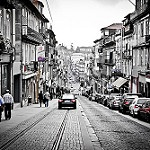

----------------------------------------
Top 5 Prediction:
 {'glacier': 1.0, 'sea': 0.0, 'mountain': 0.0, 'buildings': 0.0, 'street': 0.0}


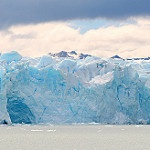

----------------------------------------
Top 5 Prediction:
 {'forest': 1.0, 'glacier': 0.0, 'mountain': 0.0, 'sea': 0.0, 'street': 0.0}


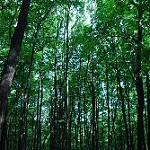

----------------------------------------
Top 5 Prediction:
 {'mountain': 0.9905, 'glacier': 0.0064, 'sea': 0.0024, 'forest': 0.0006, 'buildings': 0.0001}


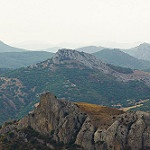

----------------------------------------
Top 5 Prediction:
 {'sea': 0.9532, 'mountain': 0.0422, 'glacier': 0.0044, 'forest': 0.0001, 'street': 0.0}


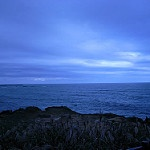

----------------------------------------
Top 5 Prediction:
 {'buildings': 1.0, 'street': 0.0, 'sea': 0.0, 'glacier': 0.0, 'mountain': 0.0}


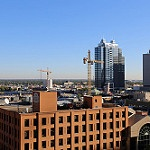

----------------------------------------
Top 5 Prediction:
 {'sea': 0.9705, 'glacier': 0.0277, 'mountain': 0.0016, 'street': 0.0001, 'buildings': 0.0}


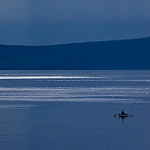

----------------------------------------
Top 5 Prediction:
 {'forest': 0.9995, 'glacier': 0.0004, 'mountain': 0.0001, 'sea': 0.0, 'street': 0.0}


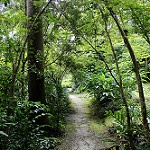

----------------------------------------
Top 5 Prediction:
 {'mountain': 0.9977, 'glacier': 0.001, 'buildings': 0.0008, 'sea': 0.0004, 'forest': 0.0001}


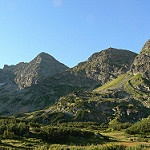

----------------------------------------
Top 5 Prediction:
 {'street': 1.0, 'buildings': 0.0, 'glacier': 0.0, 'mountain': 0.0, 'sea': 0.0}


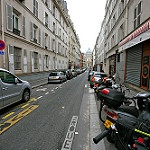

----------------------------------------
Top 5 Prediction:
 {'glacier': 0.6797, 'sea': 0.2619, 'mountain': 0.0292, 'street': 0.0216, 'buildings': 0.0072}


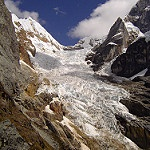

----------------------------------------
Top 5 Prediction:
 {'buildings': 0.996, 'street': 0.0035, 'sea': 0.0004, 'glacier': 0.0001, 'mountain': 0.0001}


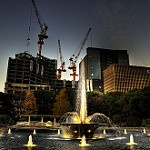

----------------------------------------


In [29]:
file_list=os.listdir("./images/")

print('-'*40)
for i in file_list :
    if '.jpg' in i: # works for jpg only 
        
        im = Image.open('images/'+ i)
        im_input = {"inputs": np.asarray(im)}
        res = predictor_new.predict(im_input)
        print('Top 5 Prediction:\n',{k : round(v, 4) for k, v in res.items() })
        im.show()
        print('-'*40)